In [139]:
import pandas as pd 

In [140]:
df = pd.read_csv('data/communes-france.csv', sep=';')
name_list = list(df["Nom Officiel Commune Minuscule"].unique())
name_list

['arradon',
 'buléon',
 'caden',
 'guillac',
 'loyat',
 'moustoir-ac',
 'plumelin',
 'pluvigner',
 'saint-dolay',
 'saint-perreux',
 'trédion',
 'baguer-morvan',
 'la chapelle du lou du lac',
 'crevin',
 'javené',
 'maxent',
 'miniac-morvan',
 'paimpont',
 'redon',
 'saint-just',
 'saint-sulpice-la-forêt',
 'saint-thurial',
 'le theil-de-bretagne',
 'tresbœuf',
 'le bodéo',
 'bourseul',
 'caurel',
 'coatascorn',
 'le fœil',
 'glomel',
 'la malhoure',
 'pléguien',
 'beaussais-sur-mer',
 'plouha',
 'plounérin',
 'treffiagat',
 'arzano',
 'le conquet',
 'hanvec',
 'le juch',
 'mellac',
 'plonévez-du-faou',
 'plougasnou',
 'plouider',
 "pont-l'abbé",
 'saint-jean-trolimon',
 "saint-étienne-du-gué-de-l'isle",
 'saint-judoce',
 'saint-julien',
 'saint-michel-en-grève',
 'coadout',
 'kerien',
 'landébia',
 'plerneuf',
 'plouër-sur-rance',
 'ploufragan',
 'plufur',
 'pontrieux',
 'saint-connec',
 'saint-nicolas-du-pélem',
 'saint-pôtan',
 'trébédan',
 'trédarzec',
 'trémeur',
 'trévérec',
 'ca

In [141]:
chars = ['.'] + sorted(list(set(''.join(name_list))))
chars

['.',
 ' ',
 "'",
 '-',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'x',
 'y',
 'z',
 'â',
 'è',
 'é',
 'ê',
 'ë',
 'î',
 'ô',
 'œ']

In [142]:
name_list = ['.' + name + '.' for name in name_list]
bi_grams = [name[i:i+2] for name in name_list for i in range(len(name)-1)]
bi_grams[:10]

['.a', 'ar', 'rr', 'ra', 'ad', 'do', 'on', 'n.', '.b', 'bu']

In [143]:
# Tokeninizing the text
char_to_token = {char: i for i, char in enumerate(chars)}
token_to_char = {i: char for i, char in enumerate(chars)}

In [144]:
count_bigrams = {}
for bigram in bi_grams:
    count_bigrams[bigram] = count_bigrams.get(bigram, 0) + 1
count_bigrams = sorted(count_bigrams.items(), key=lambda x: x[1], reverse=True)
count_bigrams[:10]

[('in', 302),
 ('nt', 258),
 ('la', 249),
 ('ai', 247),
 ('n.', 246),
 ('an', 242),
 ('ou', 237),
 ('.l', 230),
 ('t-', 215),
 ('sa', 206)]

In [145]:
import torch 
adj_matrix = torch.zeros((len(chars), len(chars)))
for bi in count_bigrams:
    char_ind = char_to_token[bi[0][0]]
    next_char_ind = char_to_token[bi[0][1]]
    adj_matrix[char_ind][next_char_ind] = bi[1]
    
adj_matrix

tensor([[0., 0., 0.,  ..., 8., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

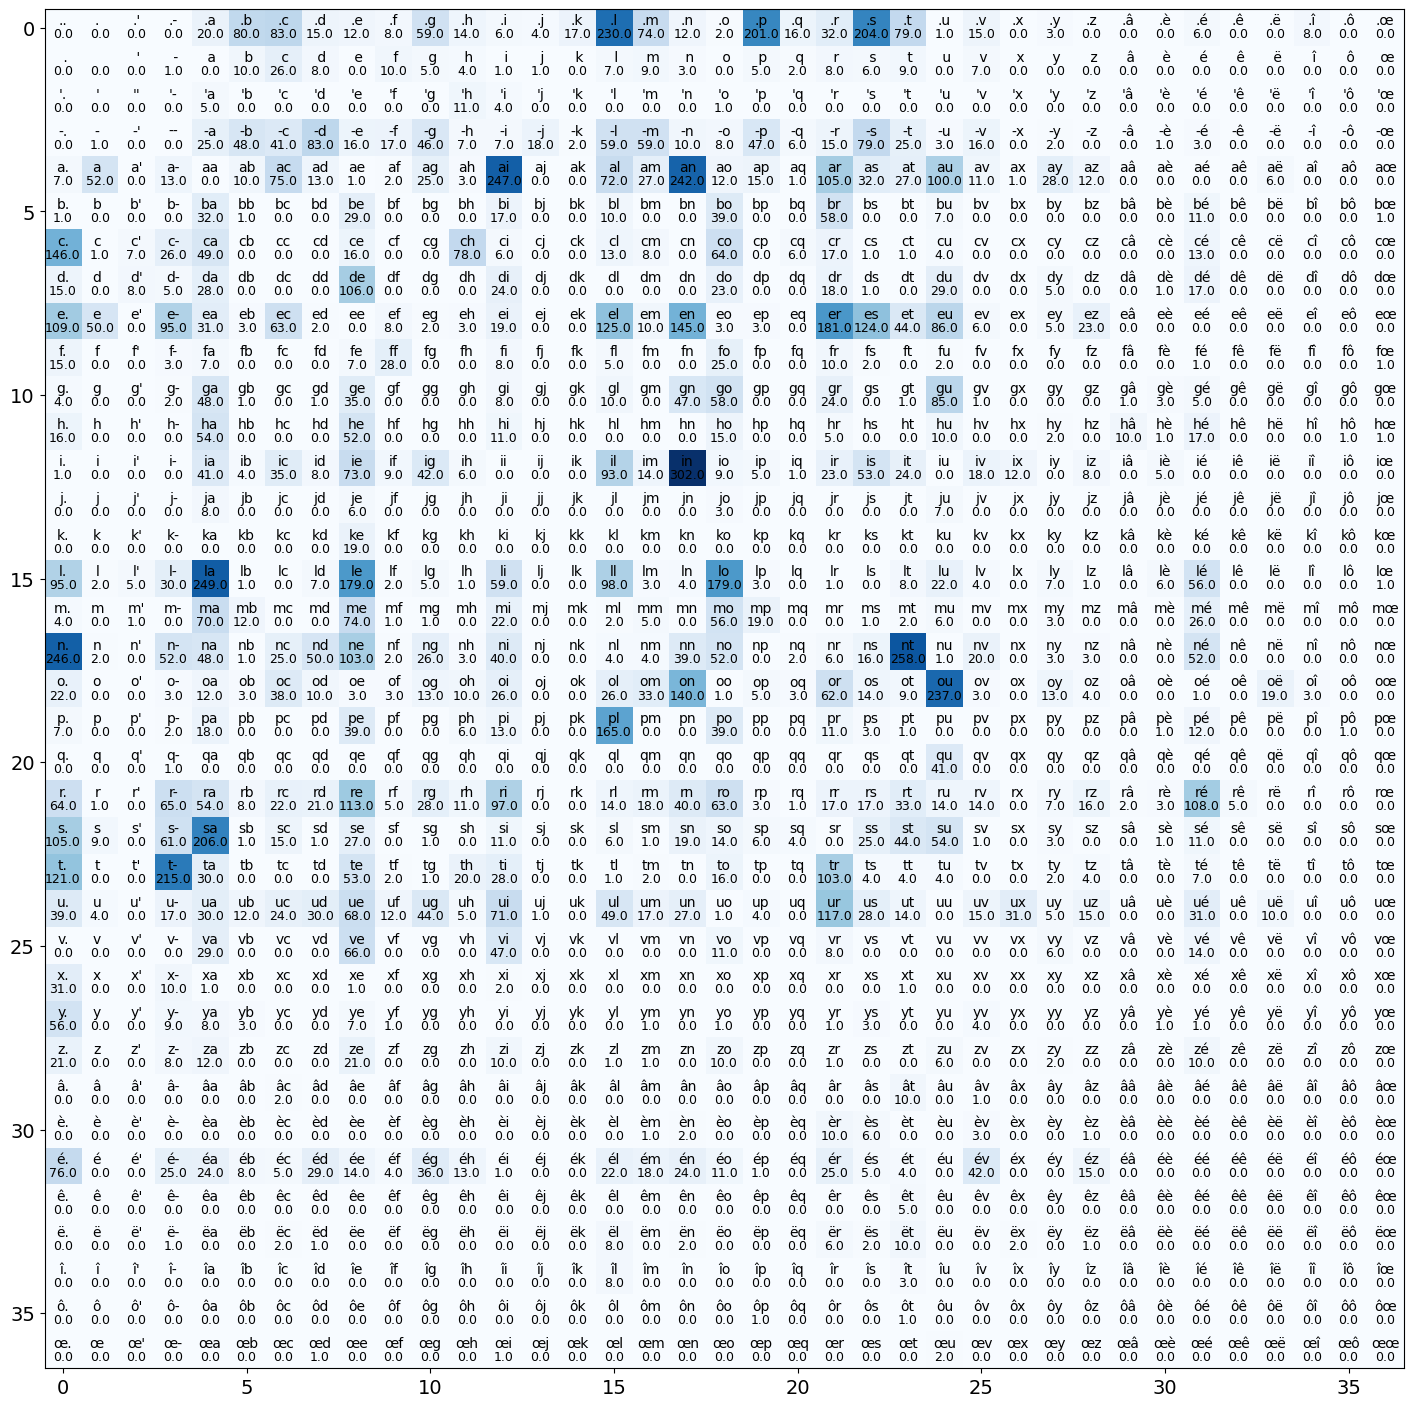

In [146]:
# Get heatmap of the adj matrix 
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 18))
plt.imshow(adj_matrix, cmap='Blues', interpolation='nearest')
# Add the bigram and its count as the title for each cell
for i in range(len(chars)):
    for j in range(len(chars)):
        plt.text(j, i, token_to_char[i]+token_to_char[j], ha="center", va="bottom", fontsize=10, color="black")
        plt.text(j, i, adj_matrix[i,j].item(), ha="center", va="top", fontsize=9, color="black")

plt.show()


In [147]:
start = adj_matrix[0]
start = start / start.sum()
start

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0167, 0.0666, 0.0691, 0.0125, 0.0100,
        0.0067, 0.0491, 0.0117, 0.0050, 0.0033, 0.0142, 0.1915, 0.0616, 0.0100,
        0.0017, 0.1674, 0.0133, 0.0266, 0.1699, 0.0658, 0.0008, 0.0125, 0.0000,
        0.0025, 0.0000, 0.0000, 0.0000, 0.0050, 0.0000, 0.0000, 0.0067, 0.0000,
        0.0000])

In [148]:
gen = torch.Generator().manual_seed(42)
sample = torch.multinomial(start, num_samples=10000, replacement=True, generator=gen)
letters = [token_to_char[i.item()] for i in sample]
letters[:10]

['b', 'b', 'c', 'b', 'n', 'm', 't', 't', 'c', 'c']

In [149]:
# Checking that we have the right proportion of each letter
# Count the proportion of times each letter appears in the list
from collections import Counter
Counter(letters)
for i in Counter(letters[:10]):
    print(i, Counter(letters)[i]/len(letters), "(expected ", adj_matrix[0][char_to_token[i]].item()/adj_matrix[0].sum().item(), ")")

b 0.0632 (expected  0.06661115736885928 )
c 0.0733 (expected  0.06910907577019151 )
n 0.0088 (expected  0.009991673605328892 )
m 0.0614 (expected  0.061615320566194835 )
t 0.0716 (expected  0.06577851790174855 )


In [150]:
probas = adj_matrix+1
probas /= probas.sum(dim=1, keepdim=True)
sum(probas[0])

tensor(1.)

In [151]:
# gen = torch.Generator().manual_seed(42)

for i in range(100):
    index = 0
    while True:
        prob = probas[index]
        index = torch.multinomial(prob, num_samples=1, replacement=True).item()
        letter = token_to_char[index]
        print(letter, end='')
        if letter == '.':
            break
    print()

    
    

suan.
plffomalangen.
pl.
porcignctr.
laivearagome.
dainanivelurn.
doumu-lèaurr.
g-pokhainsœx-ffyve.
qurinsn.
er.
pouraugouluc-aisaumeugnt-nlourtr--mm laivemocainton.
paôonenan.
lère.
mpesleonss.
saneandut.
îlècoinerenoalopomel.
rnt.
broieaureuinsaizé.
la c.
sainédœœjuleligigeurédèeu.
laez-n.
q-gant-byesurtif-din.
kél-dgonainégelarézminnntienc.
plesat.
nené.
régrint-hezœicailopesail.
qêjêîple.
lorvour.
l.
rn.
ppllifreromentrbun.
tlent-t-vére.
sanc-me.
besaintârvelouirgul.
rel.
airdéemonneaint-larz.
lon.
plar-mouiluruy.
t-fe-lefeliscœèrédr-gorgubosar.
lane br-gat-gusan.
se-pomes-zines-suduieuengerntôrec'duzy.
plare.
ben-courzulauembaileuerêtreubor.
sigeacêdsa vrderâx.
logoue.
pl.
miset-s bgec'isén-jhâèr.
lesy.
lails-gozic.
let-mapx.
ch.
sa c.
gontrzarbrilvjhoëxâèvino.
suet.
bauinont-léged-s.
laboemèqulons-leuet-saiss-c.
peèvq-saderis.
pe-bisanocainoz.
ssaisucégintr-miveme.
lon.
sat.
luèquilanro-atintixich.
bllat-pliguenoroure.
brgde decuivé.
laidés.
qèrdore îœsantinis-mes-gnmpbriauvaineu

In [152]:
bi_gram_prob = []
list_of_name = [".gouesnougkqrfufou."]
for name in list_of_name:
# for name in name_list:
    for char1, char2 in zip(name, name[1:]):
        index1 = char_to_token[char1]
        index2 = char_to_token[char2]
        logprob = torch.log(probas[index1][index2]).item()
        bi_gram_prob.append((char1+char2, probas[index1][index2].item(), logprob))
        
bi_gram_prob = sorted(bi_gram_prob, key=lambda x: x[1], reverse=True)
mle = -sum([x[2] for x in bi_gram_prob])/len(bi_gram_prob)
print("bi-gram prob: ", bi_gram_prob)
print("MLE: ", mle)

bi-gram prob:  [('ou', 0.3160690665245056, -1.1517945528030396), ('ou', 0.3160690665245056, -1.1517945528030396), ('ou', 0.3160690665245056, -1.1517945528030396), ('fo', 0.17218543589115143, -1.7591832876205444), ('go', 0.15902964770793915, -1.8386646509170532), ('es', 0.10620220750570297, -2.24241042137146), ('ue', 0.09102902561426163, -2.3965768814086914), ('ug', 0.059366755187511444, -2.8240208625793457), ('u.', 0.05277044698596001, -2.9418039321899414), ('.g', 0.048465266823768616, -3.0269079208374023), ('no', 0.04840182512998581, -3.0282177925109863), ('sn', 0.030165912583470345, -3.501042604446411), ('fu', 0.01986755058169365, -3.9186675548553467), ('kq', 0.01785714365541935, -4.025351524353027), ('uf', 0.01715039648115635, -4.065733909606934), ('qr', 0.012658228166401386, -4.369447708129883), ('rf', 0.006659267470240593, -5.011745929718018), ('gk', 0.002695417730137706, -5.916202068328857)]
MLE:  3.0178533726268344


In [153]:
def create_bigrams(name):
    return [name[i:i+2] for i in range(len(name)-1)]

create_bigrams("gouesnougkqrfufou")

['go',
 'ou',
 'ue',
 'es',
 'sn',
 'no',
 'ou',
 'ug',
 'gk',
 'kq',
 'qr',
 'rf',
 'fu',
 'uf',
 'fo',
 'ou']

In [205]:
# Using Neural Network

bi_gram_x, bi_gram_y = [], []

for word in name_list:
    for char1, char2 in zip(word, word[1:]):
        id1 = char_to_token[char1]
        id2 = char_to_token[char2]
        bi_gram_x.append(id1)
        bi_gram_y.append(id2)
        
bi_gram_x = torch.tensor(bi_gram_x)
bi_gram_y = torch.tensor(bi_gram_y)
bi_gram_x


tensor([ 0,  4, 21,  ..., 24,  7, 27])

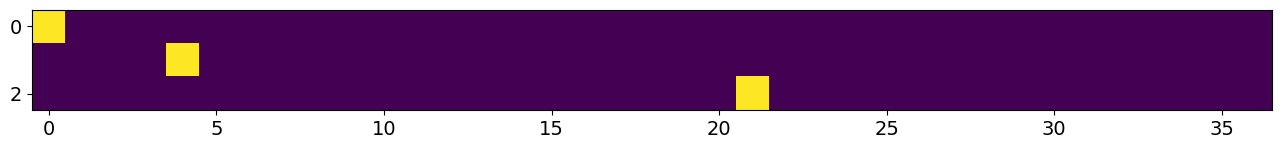

In [206]:
# One hot encoding
x_enc = torch.nn.functional.one_hot(bi_gram_x, num_classes=len(chars)).float()
y_enc = torch.nn.functional.one_hot(bi_gram_y, num_classes=len(chars)).float()
plt.imshow(x_enc[:3])

In [207]:
weights = torch.randn((len(chars), len(chars)), requires_grad=True)
weights

tensor([[-0.3552, -0.2093,  1.3527,  ..., -0.8379, -0.0146,  0.7720],
        [ 0.3819,  1.6734, -1.6984,  ..., -1.4113, -0.8496,  0.5471],
        [-0.2423,  1.0045, -0.9250,  ...,  0.1029, -1.0701, -1.6433],
        ...,
        [ 1.0467, -0.8763, -0.0480,  ...,  0.6422, -0.5336,  1.2813],
        [ 0.3452,  0.8650, -0.2280,  ..., -0.4094,  1.3243,  0.1100],
        [ 2.1541,  0.8757,  0.2683,  ..., -1.1845, -0.3772,  1.2438]],
       requires_grad=True)

In [208]:
logits = x_enc @ weights


In [209]:
logits[3, 23].item()

0.08410350978374481

In [210]:
counts = logits.exp()
prob_logits = counts / counts.sum(dim=1, keepdim=True)
prob_logits


tensor([[0.0133, 0.0154, 0.0735,  ..., 0.0082, 0.0187, 0.0411],
        [0.0077, 0.1885, 0.0095,  ..., 0.0251, 0.0192, 0.0070],
        [0.0093, 0.0059, 0.0024,  ..., 0.0174, 0.0851, 0.0255],
        ...,
        [0.0130, 0.0053, 0.0037,  ..., 0.0097, 0.0081, 0.0086],
        [0.0356, 0.0226, 0.0231,  ..., 0.0687, 0.0156, 0.0615],
        [0.0083, 0.0088, 0.0131,  ..., 0.0020, 0.0037, 0.0386]],
       grad_fn=<DivBackward0>)

In [211]:
prob_logits[0].sum()

tensor(1.0000, grad_fn=<SumBackward0>)

In [226]:
# Getting neg log likelihood
mle = 0
for index in range(len(bi_gram_x)):
    input = bi_gram_x[index].item()
    output = bi_gram_y[index].item()
    print(index, input, output)
    print(token_to_char[input], token_to_char[output], ": ", prob_logits[index][bi_gram_y[index]])

loss = -prob_logits[torch.arange(len(bi_gram_x)), bi_gram_y].log().mean()          

0 0 4
. a :  tensor(0.0039, grad_fn=<SelectBackward0>)
1 4 21
a r :  tensor(0.0141, grad_fn=<SelectBackward0>)
2 21 21
r r :  tensor(0.0081, grad_fn=<SelectBackward0>)
3 21 4
r a :  tensor(0.0215, grad_fn=<SelectBackward0>)
4 4 7
a d :  tensor(0.0013, grad_fn=<SelectBackward0>)
5 7 18
d o :  tensor(0.0148, grad_fn=<SelectBackward0>)
6 18 17
o n :  tensor(0.0069, grad_fn=<SelectBackward0>)
7 17 0
n . :  tensor(0.0090, grad_fn=<SelectBackward0>)
8 0 5
. b :  tensor(0.0217, grad_fn=<SelectBackward0>)
9 5 24
b u :  tensor(0.0244, grad_fn=<SelectBackward0>)
10 24 15
u l :  tensor(0.0032, grad_fn=<SelectBackward0>)
11 15 31
l é :  tensor(0.1179, grad_fn=<SelectBackward0>)
12 31 18
é o :  tensor(0.0802, grad_fn=<SelectBackward0>)
13 18 17
o n :  tensor(0.0069, grad_fn=<SelectBackward0>)
14 17 0
n . :  tensor(0.0090, grad_fn=<SelectBackward0>)
15 0 6
. c :  tensor(0.0093, grad_fn=<SelectBackward0>)
16 6 4
c a :  tensor(0.0216, grad_fn=<SelectBackward0>)
17 4 7
a d :  tensor(0.0013, grad_fn=<Se

In [237]:
weights = torch.randn((len(chars), len(chars)), requires_grad=True)

In [240]:
# Forward pass
logits = x_enc @ weights
counts = logits.exp()
prob_logits = counts / counts.sum(dim=1, keepdim=True)
loss = -prob_logits[torch.arange(len(bi_gram_x)), bi_gram_y].log().mean()
loss

tensor(4.1015, grad_fn=<NegBackward0>)

In [241]:
# Backward pass 
weights.grad = None
loss.backward()
learning_rate = 0.1
weights.data -= learning_rate * weights.grad.data
loss

tensor(4.1015, grad_fn=<NegBackward0>)

In [278]:
learning_rate = 0.8
weights = torch.randn((len(chars), len(chars)), requires_grad=True)

for i in range(100000):
    logits = x_enc @ weights
    counts = logits.exp()
    prob_logits = counts / counts.sum(dim=1, keepdim=True)
    loss = -prob_logits[torch.arange(len(bi_gram_x)), bi_gram_y].log().mean()
    loss.backward()
    weights.data -= learning_rate * weights.grad.data
    weights.grad = None
    print("For iteration: ", loss.item())

For iteration:  4.138852596282959
For iteration:  4.132504940032959
For iteration:  4.126183032989502
For iteration:  4.119886875152588
For iteration:  4.113617420196533
For iteration:  4.1073737144470215
For iteration:  4.1011552810668945
For iteration:  4.094961643218994
For iteration:  4.0887932777404785
For iteration:  4.0826497077941895
For iteration:  4.076530456542969
For iteration:  4.070436000823975
For iteration:  4.064366340637207
For iteration:  4.058319568634033
For iteration:  4.0522966384887695
For iteration:  4.046298027038574
For iteration:  4.040322780609131
For iteration:  4.034370422363281
For iteration:  4.028441905975342
For iteration:  4.022535800933838
For iteration:  4.016653060913086
For iteration:  4.0107927322387695
For iteration:  4.004955768585205
For iteration:  3.9991402626037598
For iteration:  3.99334716796875
For iteration:  3.987576484680176
For iteration:  3.981827974319458
For iteration:  3.9761016368865967
For iteration:  3.9703972339630127
For it

In [287]:
names = set()
for i in range(100):
    loss = 0
    output = []
    index = 0
    while True :
        enc_input = torch.nn.functional.one_hot(torch.tensor([index]), num_classes=len(chars)).float()
        logits = enc_input @ weights
        counts = logits.exp()
        prob_logits = counts / counts.sum(1, keepdims=True)
        index = torch.multinomial(prob_logits, num_samples=1, replacement=True).item()
        output.append(token_to_char[index])
        loss += -prob_logits[0][index].log().item()
        if token_to_char[index] == '.':
            if len(output) > min(len(n) for n in name_list):
                names.add((''.join(output[:-1]), loss/len(output)))
            break

In [288]:
names = sorted(list(names), key=lambda x: x[1])
names

[('saintrn', 1.63815788179636),
 ('laisainountherint', 1.8053121368090312),
 ('pl-man', 1.836082364831652),
 ('s-mon', 1.8802277445793152),
 ('saloun', 1.8923239197049821),
 ('gurent', 1.90583302293505),
 ('t-bour-s', 1.9376312626732721),
 ('mantes', 1.9546256746564592),
 ('trérint-ves', 1.9747995684544246),
 ('nt-t-jelailan', 2.0068730882235934),
 ('quiner', 2.0570568601999963),
 ('lerins-s', 2.0883473886383905),
 ('pailanoy', 2.095911290910509),
 ('chinstraint', 2.101967533429464),
 ('sainacha t-cealaicon', 2.123482196103959),
 ('pre-pelint', 2.1335112127390774),
 ('rannterin', 2.156245881319046),
 ('ausanan-splint-dailer-s', 2.1614666680494943),
 ('coudeneucantene', 2.1667791455984116),
 ('plornenégent-a haier', 2.1779027694747564),
 ('s-lenone', 2.1809345881144204),
 ("ploind'it", 2.1905802369117735),
 ('br-plinit-t-gurt-chereroulilec-menvinoufrézé', 2.1914468089739483),
 ('suzen', 2.2028710643450418),
 ('plemeue', 2.2060140892863274),
 ('ît-mous', 2.208843320608139),
 ('loux-sanqu

In [275]:
log = (torch.nn.functional.one_hot(torch.tensor(0), num_classes=len(chars)).float() @ weights).exp()
p = log / log.sum()

In [276]:
for ind in range(len(chars)):
    print(token_to_char[ind], p[ind].item())

. 0.0016286566387861967
  0.0016777138225734234
' 0.0015498610446229577
- 0.000764430733397603
a 0.015846598893404007
b 0.06594791263341904
c 0.068446584045887
d 0.011454841122031212
e 0.009246940724551678
f 0.005878874566406012
g 0.04845452308654785
h 0.010442789644002914
i 0.00461743725463748
j 0.0033044610172510147
k 0.013317245990037918
l 0.1908574402332306
m 0.060950446873903275
n 0.009088346734642982
o 0.002495513530448079
p 0.16670984029769897
q 0.012522128410637379
r 0.025941573083400726
s 0.1692078411579132
t 0.06511500477790833
u 0.001193610136397183
v 0.011658232659101486
x 0.0009268078138120472
y 0.0029670135118067265
z 0.0015724638942629099
â 0.0012904417235404253
è 0.001498010940849781
é 0.00309198722243309
ê 0.0017024597618728876
ë 0.0015375999500975013
î 0.00511360727250576
ô 0.0011781619396060705
œ 0.0008025034330785275


In [284]:
min(len(n) for n in name_list)


5